Your Name and PRN:
- Name : Snehal Awadan
- PRN  : 240340128033
- Date : 24-05-2024

# Image Processing with Neural Network

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Assignment - Answer all Questions
- **Q1**: Is this model more accurate compared to previous model?
- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|???|???|???|
|...|...|...|...|...|...|
|n|...|...|...|...|...|

- **Q3**: What lines will you change to convert it into multi-class prediction model?
- **Q4**: How many epochs are sufficient?

In [1]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
###-----------------------
### Basic hyper-parameters
###-----------------------

inpDir = '../input'           # set input path as per your system
outDir = '../output'         # set output path as per your system

RANDOM_STATE = 24          # remove at the time of promotion to production
np.random.seed(RANDOM_STATE)        # Set Random Seed for reproducible  results

EPOCHS = 2000          # number of epochs
ALPHA = 0.5            # learning rate
NUM_SAMPLES = 1280     # How many samples we want to generate 
NOISE = 0.2            # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

In [3]:
# read the data 

X, y = datasets.make_moons(n_samples=NUM_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 2.27884737,  0.26168543],
        [-0.23790006,  0.86719265],
        [-0.00391944, -0.28678754],
        [ 2.04347758,  0.63303644],
        [ 0.09689466, -0.25552249]]),
 array([1, 0, 1, 1, 1], dtype=int64))

In [4]:
# define X and y:

data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()


,A,B,target
0,2.278847,0.261685,1
1,-0.237900,0.867193,0
2,-0.003919,-0.286788,1
3,2.043478,0.633036,1
4,0.096895,-0.255522,1


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1280 non-null   float64
 1   B       1280 non-null   float64
 2   target  1280 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 30.1 KB


In [6]:
# check null value:
data_df.isnull().sum()

A         0
B         0
target    0
dtype: int64

In [7]:
# perform basic operations:

data_df.describe().T # Generate descriptive statistic

,count,mean,std,min,25%,50%,75%,max
A,1280.0,0.506595,0.891242,-1.468541,-0.120409,0.503414,1.131021,2.432350
B,1280.0,0.247313,0.528813,-0.976250,-0.193289,0.233604,0.670022,1.472694
target,1280.0,0.500000,0.500195,0.000000,0.000000,0.500000,1.000000,1.000000


In [8]:
# find out unique value of the y: 

data_df.target.unique()

array([1, 0], dtype=int64)

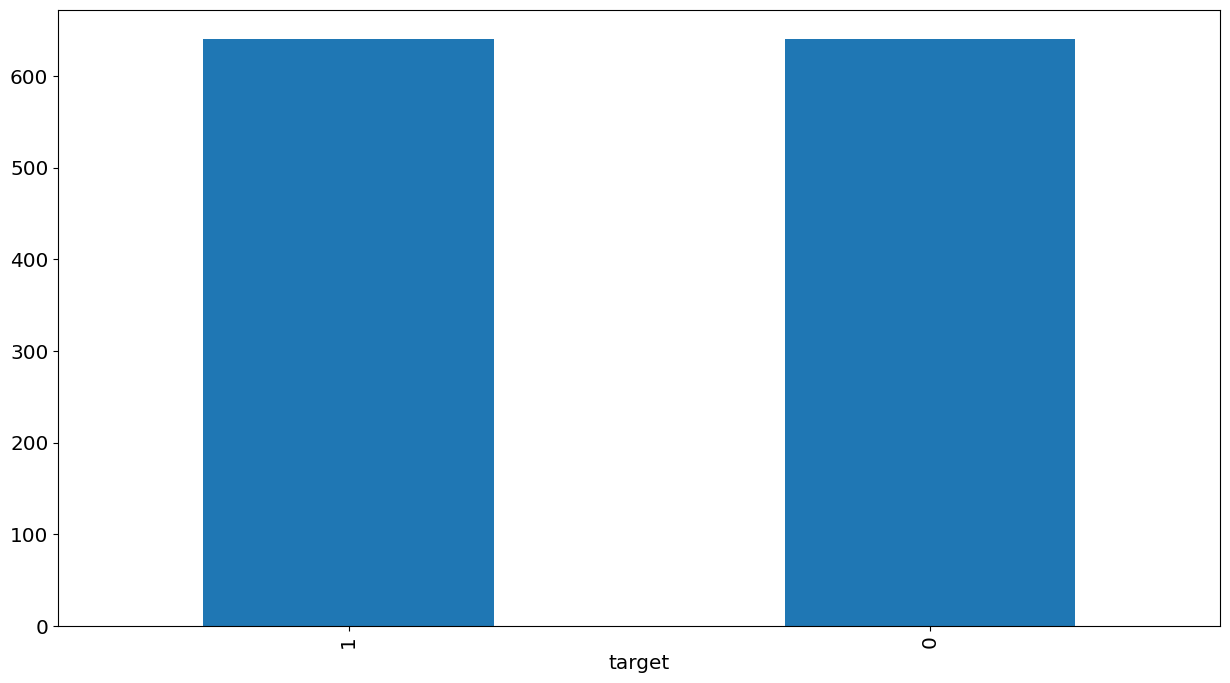

In [9]:
# plot the bar of target vs count:

fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

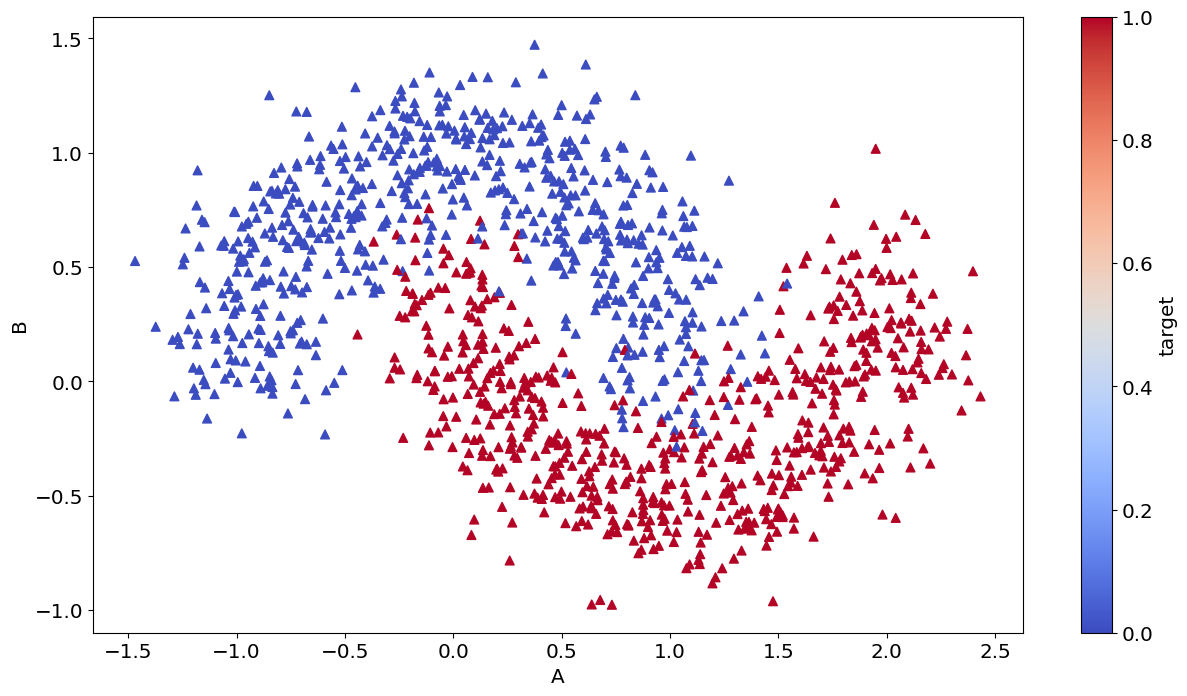

In [10]:
# Plot the scatter plot:

data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '^',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

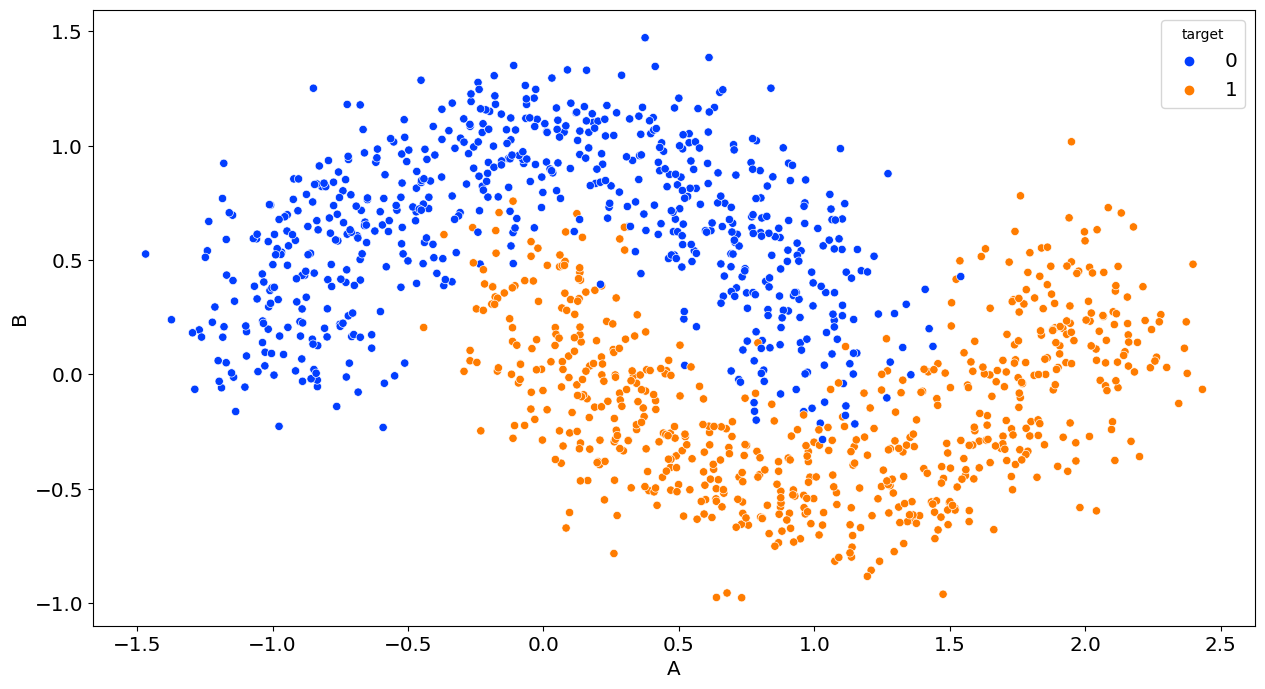

In [11]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

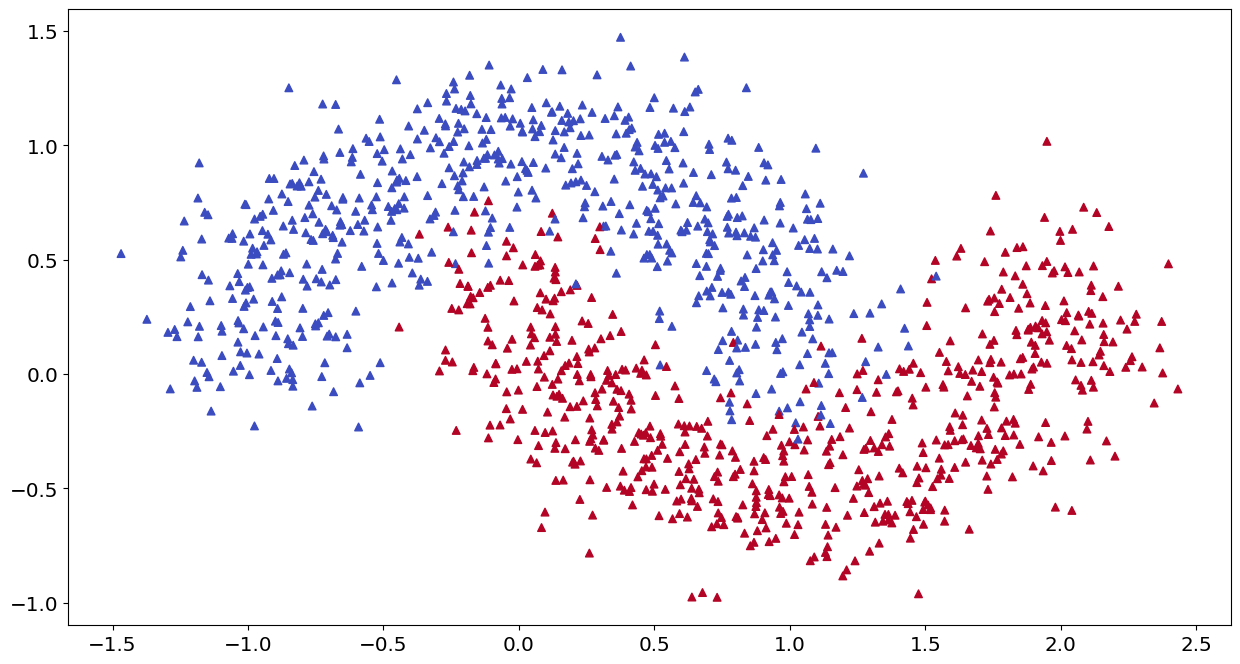

In [12]:
# to plot X directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '^', cmap=CMAP);

In [13]:
y = pd.get_dummies(y).to_numpy() #Converting to One-Hot Encoding
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [14]:

y.shape

(1280, 2)

In [15]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

In [16]:
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((1024, 2), (256, 2), (1024, 2), (256, 2))

In [17]:
# Softmax function

def fn_softmax(z):
    
    '''
    Args:
     z: aa matrix of z values of shape(m,n_output)
     returns: softmax values of z
    '''
    
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis =1, keepdims=True)

In [18]:
sm = fn_softmax(np.asarray([[8,5,0],[-10,0,10]]))
sm

array([[9.52269826e-01, 4.74107229e-02, 3.19450938e-04],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

In [19]:
sm.sum(axis=1, keepdims=True)  

array([[1.],
       [1.]])

In [20]:
sm.sum()

1.9999999999999998

In [21]:
sm.sum(axis=1, keepdims=True).shape

(2, 1)

In [22]:
def fn_activ(z):
    return np.tanh(z)


def fn_activ_prime(a):
    return 1 - np.tanh(a)**2

In [23]:
def predict(model,X_p):
    
    W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
    
    #  forward propgation
    
    
    #layer 1
    z1 = X_p.dot(W1)+b1  #Aggregation
    a1 = fn_activ(z1)   #Activation 
        
    #layer 2
    z2=a1.dot(W2)+b2  #Aggregation
    a2=fn_softmax(z2)  #Activation
        
    return np.argmax(a2, axis=1)       # argmax => give the highest probability value

In [24]:
def calculate_loss(model,X_l,y_l):
    
    W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']

    m = X_l.shape[0]
    
    
    #layer 1
    z1=X_l.dot(W1)+b1  #Aggregation
    a1=fn_activ(z1)   #Activation 
        
    #layer 2
    z2=a1.dot(W2)+b2  #Aggregation
    a2=fn_softmax(z2)  #Activation
    
    data_loss= -(y_l*np.log(a2) + (1-y_l)*np.log(1-a2)).sum() #binary
        
    return data_loss/m

In [25]:
def build_model(X_tr,y_tr,nn_hdim,nn_out,alpha=ALPHA,epochs=EPOCHS):
    '''
    Args:
    X_tr :Training Feature
    y_tr : Training labels
    nn_hdim : number of nodes in the hidden layer
    nn_out : size of output
    '''
    m,nn_input_dim = X_tr.shape
    nn_output_dim = nn_out
    
    #size W1=(2,4)
    W1 = np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    
    #size W2=(4,2)
    W2 = np.random.rand(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)
    
    #size b1 = 4
    b1 = np.zeros((1,nn_hdim),dtype=np.float32)
    
    #size b2 = 2
    b2=np.zeros((1,nn_output_dim),dtype=np.float32)

    curr_loss=0
    loss,epoch=[],[]
    
    for i in range(0,epochs):
        ##forward propogation
        
        #layer 1 (marked 3 on diagram given)
        z1=X_tr.dot(W1)+b1
        a1=fn_activ(z1)
        
        #layer 2 (marked 1 on diagram given)
        z2=a1.dot(W2)+b2
        a2=fn_softmax(z2)
        
        #back propogation
        
        #back propogation for layer 2
        assert(a2.shape==y_tr.shape),f'check y{a2.shape}/{y_tr.shape}'
        dz2=a2-y_tr #Remember dim of a2 and y to be same
        
        dW2=(a1.T).dot(dz2)
        assert(W2.shape==dW2.shape),f'check W2{W2.shape}/{dW2.shape}'
        
        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape==db2.shape),f'check b2{b2.shape}/{db2.shape}'
    
        da1 = dz2.dot(W2.T)
        assert(a1.shape==da1.shape),f'check b2{a2.shape}/{da1.shape}'

        
        #Layer 1 (marked 4 on given diagram)
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape==dz1.shape),f'check b2{z1.shape}/{dz1.shape}'
        
        dW1=(X_tr.T).dot(dz1)
        assert(W1.shape==dW1.shape),f'check W1{W1.shape}/{dW1.shape}'
        
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(b1.shape==db1.shape),f'check b1{b1.shape}/{db1.shape}'
        
        ##gradient update
        W1+=-alpha*dW1/m   #m=total rows
        b1+=-alpha*db1/m
        W2+=-alpha*dW2/m
        b2+=-alpha*db2/m
 
        model={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        
        curr_loss=calculate_loss(model,X_tr,y_tr)
        loss.append(curr_loss)
        epoch.append(i)
        
        if i%1000==0:
            print(f'After epoch:{i:3d}; loss:{curr_loss: .5f}')
        
    loss_hist['epoch']=epoch
    loss_hist['loss']=loss
    
    return model


In [26]:
loss_hist={}

In [27]:
nn_out_dim = 2

# build the model:

model = build_model(X_train,y_train,5,nn_out_dim)
model

After epoch:  0; loss: 1.38497
After epoch:1000; loss: 0.18302


{'W1': array([[ 3.0233552 ,  3.45475443,  2.02375055,  0.50051733,  0.53066119],
        [-1.26523625,  1.88838814, -1.30453908, -0.15161521, -0.17104641]]),
 'b1': array([[ 1.379221  , -2.0517938 , -2.5804236 ,  0.04820082, -0.45714837]],
       dtype=float32),
 'W2': array([[-2.4666117 ,  2.77381794],
        [ 4.26857955, -3.54865779],
        [-2.68323696,  3.03269378],
        [-0.97169492,  1.52334884],
        [-1.73070799,  2.37291006]]),
 'b2': array([[-0.30374944,  0.30374944]], dtype=float32)}

In [28]:
model['b2'].shape

(1, 2)

<Axes: xlabel='epoch'>

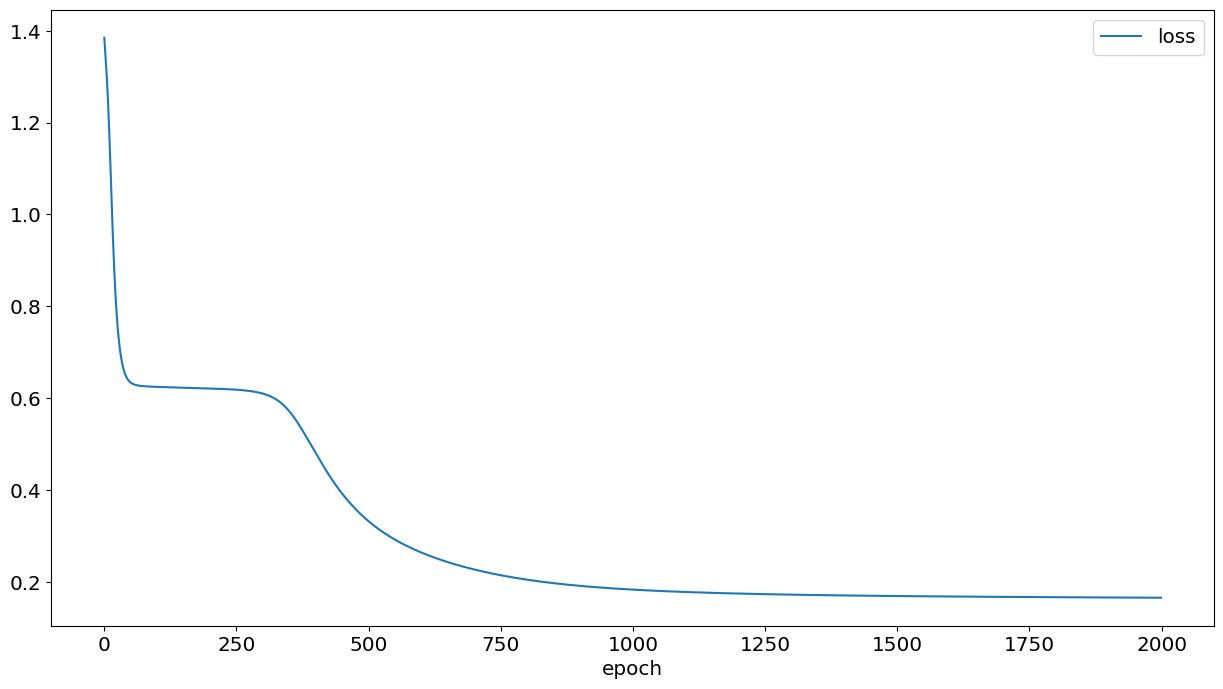

In [29]:
pd.DataFrame(loss_hist).plot(x='epoch')

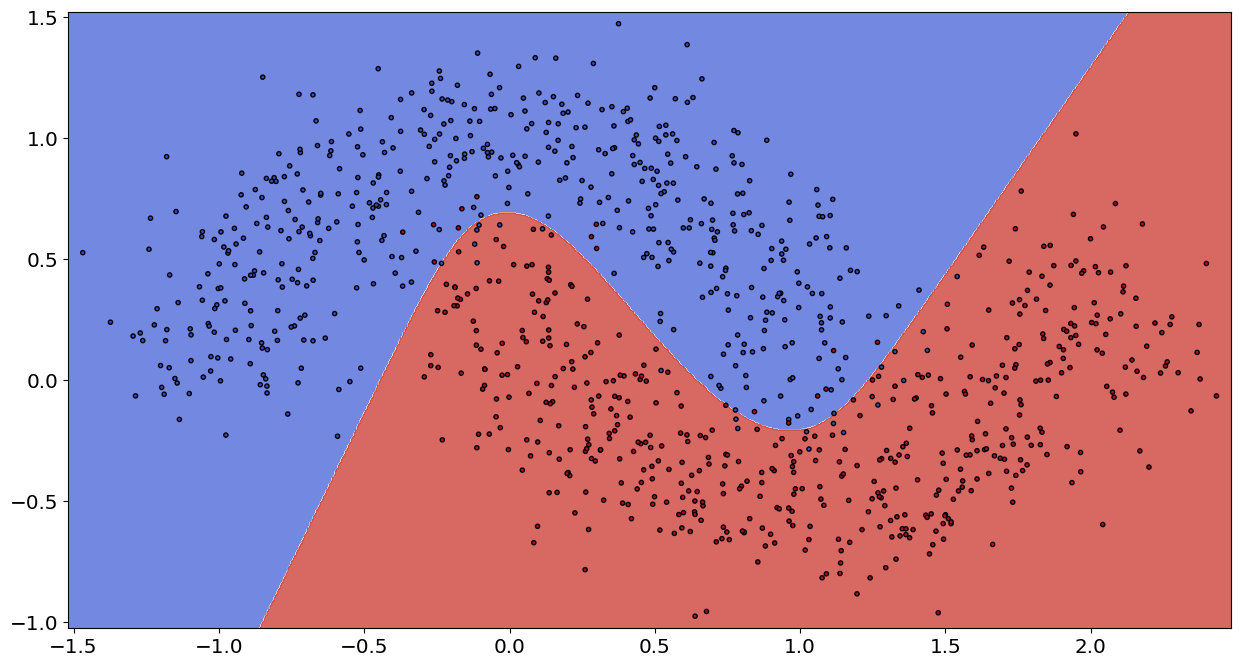

In [30]:
X = X_train
fig,ax = plt.subplots()

dm=0.005 #Spacing steps 
x_min,x_max=X[:,0].min()-0.05,X[:,0].max()+0.05
y_min,y_max=X[:,1].min()-0.05,X[:,1].max()+0.05

xx,yy=np.meshgrid(np.arange(x_min,x_max,dm),
                 np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]

y_pred  = predict(model, XX)

Z = np.array(y_pred).reshape(xx.shape) 

ax.contourf(xx,yy,Z,cmap='coolwarm',alpha = 0.8)

ax.scatter(X[:,0],X[:,1],c=y_train.argmax(axis=1), edgecolor='k', cmap=CMAP, marker='.')

In [31]:
#accuracy and confusion of train set
y_pred = predict(model, X_train)
print(accuracy_score(y_train.argmax(axis=1), y_pred))
cm = confusion_matrix(y_train.argmax(axis=1),y_pred)
cm

0.96484375


array([[491,  21],
       [ 15, 497]], dtype=int64)

In [35]:
#accuracy and confusion of test set

y_pred = predict(model, X_test)

print(accuracy_score(y_test.argmax(axis=1), y_pred))

cm = confusion_matrix(y_test.argmax(axis=1),y_pred)     # argmax ==> give us the highest probability value

cm

0.984375


array([[128,   0],
       [  4, 124]], dtype=int64)

In [33]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       128
           1       1.00      0.97      0.98       128

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256



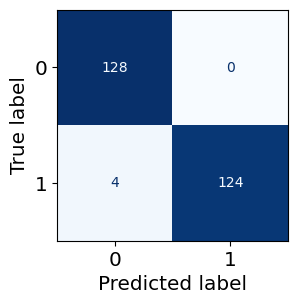

In [34]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax, cmap='Blues',colorbar=False)
ax.grid(False)

- **Q1**: Is this model more accurate compared to previous model?

Yes.

- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.97|0.96|Base case|
|2|3|0.01|0.87|0.92|Accuracy on train set and test set decreased|
|3|2|0.001|0.85|0.89|There is slight decrease in accuracy |
|4|5|0.5|0.96|0.98|Accuracy increases when Learning rate and hidden layer increases|

- **Q3**: What lines will you change to convert it into multi-class prediction model?

- **Ans**: 1.Apply one hot encoding of label columns

        2. Add softmax function as it is multi-layer class.

            def fn_softmax(z):
            exp_z = np.exp(z)
            return exp_z / np.sum(exp_z, axis =1, keepdims=True)



- **Q4**: How many epochs are sufficient?

- **Ans**: When learning rate is high less epochs are needed and vice versa for this model. So we cannot specify the exact number of epochs.